In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read in data from file

Source: https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

In [8]:
dataset = []
with open("data\\SMSSpamCollection") as file:
    for line in file:
        dataset.append(line.strip().split("\t"))

df = pd.DataFrame(
    dataset,
    columns=['labels', 'message']
)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message']).toarray()
y = df['labels']

In [10]:
X.shape, y.shape

((5574, 8752), (5574,))

### Model Development

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)
nb_model.score(X_test, y_test)

y_pred = nb_model.predict(X_test)

### Model Evaluation

In [6]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
label_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
label_count = cf_matrix.flatten()
labels = np.asarray([f"{v1}\n{v2}" for v1, v2 in zip(label_names, label_count)]).reshape(2, 2)

accuracy = (cf_matrix[0, 0] + cf_matrix[1, 1]) / np.sum(cf_matrix)
precision = cf_matrix[1, 1] / (cf_matrix[1, 1] + cf_matrix[1, 0])
recall = cf_matrix[1, 1] / (cf_matrix[1, 1] + cf_matrix[0, 1])
f1_score = 2 * (precision * recall) / (precision + recall)

s = f"Accuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1_Score: {f1_score:.2f}"

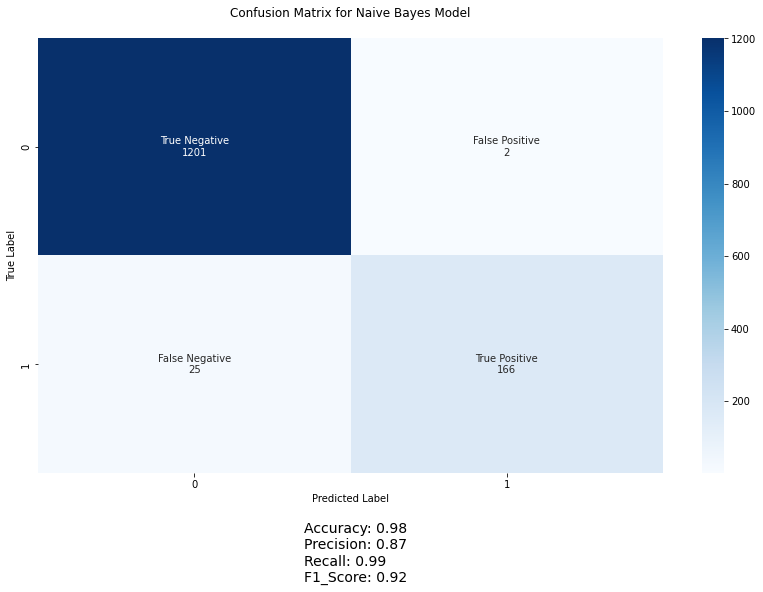

In [7]:
plt.figure(figsize=(14, 8))
plt.title("Confusion Matrix for Naive Bayes Model\n")
sns.heatmap(
    cf_matrix,
    cmap="Blues",
    annot=labels,
    fmt=""
)

plt.text(
    x=0.85, 
    y=2.5, 
    s=s,
    fontsize=14
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()